<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных" data-toc-modified-id="Изучение-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных</a></span></li><li><span><a href="#Разбиение-данных-на-выборки" data-toc-modified-id="Разбиение-данных-на-выборки-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Разбиение данных на выборки</a></span></li><li><span><a href="#Исследование-моделей" data-toc-modified-id="Исследование-моделей-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Исследование моделей</a></span><ul class="toc-item"><li><span><a href="#Вывод-исследования" data-toc-modified-id="Вывод-исследования-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Вывод исследования</a></span></li></ul></li><li><span><a href="#Проверка-моделей-на-тестовой-выборке" data-toc-modified-id="Проверка-моделей-на-тестовой-выборке-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка моделей на тестовой выборке</a></span></li><li><span><a href="#Проверка-моделей-на-адекватность" data-toc-modified-id="Проверка-моделей-на-адекватность-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Проверка моделей на адекватность</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

# Рекомендация тарифов

Известно, что многие клиенты оператора мобильной связи «Мегалайн» пользуются архивными тарифами. В распоряжении имеются данные о поведении клиентов, которые уже перешли на эти тарифы.

Цель оператора — построить систему, способную проанализировать поведение клиентов и предложить пользователям новый тариф: «Смарт» или «Ультра».

Задача исследования — построить модель классификации с максимально большим значением accuracy, которая выберет подходящий тариф. Необходимо, чтобы доля правильных ответов не менее 0.75.

**Исследование пройдёт в шесть этапов:**
 1. Изучение данных;
 2. Разбиение данных на выборки;
 3. Исследование моделей;
 4. Проверка моделей на тестовой выборке;
 5. Проверка моделей на адекватность;
 6. Общий вывод.

## Изучение данных

In [1]:
# импорт библиотек
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [2]:
# сброс ограничений на количество выводимых рядов
pd.set_option('display.max_rows', None)
 
# сброс ограничений на число столбцов
pd.set_option('display.max_columns', None)
 
# сброс ограничений на количество символов в записи
pd.set_option('display.max_colwidth', None)

Данные для исследования получаем из файла `users_behavior.csv`:

In [3]:
# чтение файлов с данными и сохранение в df
try:
    df = pd.read_csv('datasets/users_behavior.csv')
except:
    df = pd.read_csv('/datasets/users_behavior.csv')

**Описание данных:**
*	`сalls` — количество звонков;
*	`minutes` — суммарная длительность звонков в минутах;
*	`messages` — количество sms-сообщений;
*	`mb_used` — израсходованный интернет-трафик в Мб;
*	`is_ultra` — каким тарифом пользовался в течение месяца («Ультра» — 1, «Смарт» — 0).

In [4]:
# получение первых пяти строк таблицы
display(df.head())
# получение общей информации о данных
display(df.info())

,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


None

In [5]:
# числовое описание данных таблицы df_games
df.describe()

,calls,minutes,messages,mb_used,is_ultra
count,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000
mean,63.038892,438.208787,38.281269,17207.673836,0.306472
std,33.236368,234.569872,36.148326,7570.968246,0.461100
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,274.575000,9.000000,12491.902500,0.000000
50%,62.000000,430.600000,30.000000,16943.235000,0.000000
75%,82.000000,571.927500,57.000000,21424.700000,1.000000
max,244.000000,1632.060000,224.000000,49745.730000,1.000000


💡 В исходном файле содержатся данные о поведении клиентов оператора мобильной связи «Мегалайн». Клиенты пользуются тарифами "Смарт" и "Ультра".

Столбцы в датафреймах содержат вещественные и целочисленные типы данных. Данные уже прошли предобработку, поэтому в данных не содержится дубликатов, пропусков и нарушений стиля заголовков. 

## Разбиение данных на выборки

Разделим данные на обучающую (60%), валидационную (20%) и тестовую (20%) выборки:

In [6]:
# количество строк в исходном наборе данных
len(df)

3214

In [7]:
# разделение данных на обучающую, валидационную и тестовую выборки
df_train, df_test = train_test_split(df, train_size=0.6, test_size=0.4, random_state=123)
df_test, df_valid = train_test_split(df_test, test_size=0.5, random_state=123)
print("Процент данных в обучающей выборке:", '{:.0%}'.format(len(df_train)/len(df)))
print("Процент данных в валидационной выборке", '{:.0%}'.format(len(df_valid)/len(df)))
print("Процент данных в тестовой выборке", '{:.0%}'.format(len(df_test)/len(df)))

Процент данных в обучающей выборке: 60%
Процент данных в валидационной выборке 20%
Процент данных в тестовой выборке 20%


In [8]:
# cоздание переменных для признаков и целевого признака
features_train = df_train.drop(['is_ultra'], axis=1)
target_train = df_train['is_ultra']

features_valid = df_valid.drop(['is_ultra'], axis=1)
target_valid = df_valid['is_ultra']

features_test = df_test.drop(['is_ultra'], axis=1)
target_test = df_test['is_ultra']

## Исследование моделей

**Модель дерева решений**

Проверим десять моделей с разной глубиной дерева и найдем лучшую модель.

In [9]:
best_accuracy = 0

# цикл по гиперпараметру "глубина дерева"
for depth in range(1, 11):
    model = DecisionTreeClassifier(random_state=12345, max_depth=depth)
    model.fit(features_train, target_train)
    predictions = model.predict(features_valid)
    accuracy = accuracy_score(target_valid, predictions)
#    print(f'Глубина дерева={depth}:', accuracy)
    
    if accuracy > best_accuracy:        
        best_accuracy = accuracy
        best_depth = depth
             
print(f'Глубина дерева: {best_depth},', f'\nКачество модели:{best_accuracy}.')

Глубина дерева: 3, 
Качество модели:0.7962674961119751.


Посмотрим на логику решения дерева:

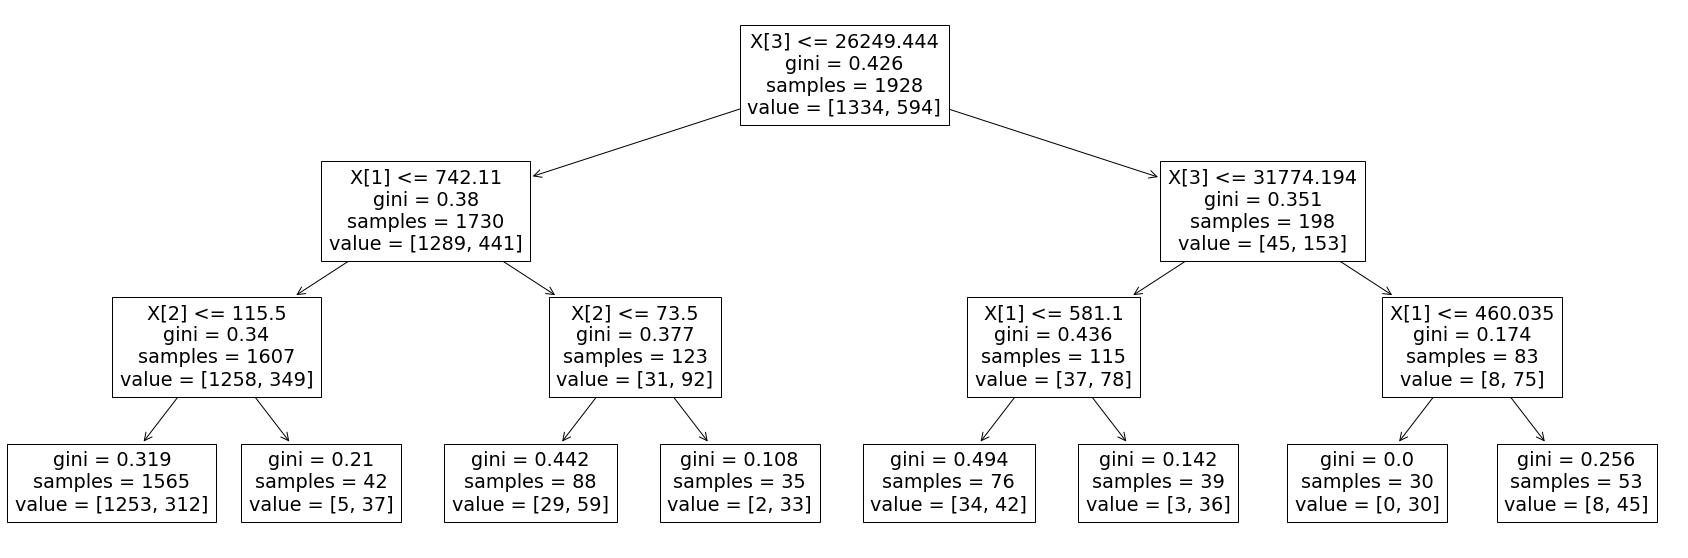

In [10]:
import matplotlib.pyplot as plt
from sklearn import tree

model = DecisionTreeClassifier(random_state=12345, max_depth=3)
model.fit(features_train, target_train)

fig, ax = plt.subplots(figsize=(30,10))
tree.plot_tree(model)
plt.show()

**Модель случайного леса**

Проверим модели с разным количеством деревьев, глубиной  и минимальным количеством объектов в листе  и найдем лучшую модель.

In [11]:
best_accuracy = 0

# циклs по гиперпараметрам: глубина дерева, количество деревьев, минимальное количество объектов в листе
for depth in range(1, 11):
    for est in range(5, 51, 5):
        for leaf in range(1, 6):
            model = RandomForestClassifier(random_state=12345, max_depth=depth, n_estimators=est, min_samples_leaf=leaf)
            model.fit(features_train, target_train)
            predictions = model.predict(features_valid)
            accuracy = accuracy_score(target_valid, predictions)
            
            if accuracy > best_accuracy:
                best_depth = depth
                best_est = est
                best_accuracy = accuracy
                best_leaf = leaf

print(f'Глубина дерева: {best_depth},',
      f'\nКоличество деревьев: {best_est},',
      f'\nМинимальное кол-во объектов в узле: {best_leaf},',
      f'\nКачество модели: {best_accuracy}.'
     )

Глубина дерева: 8, 
Количество деревьев: 5, 
Минимальное кол-во объектов в узле: 2, 
Качество модели: 0.8040435458786936.


**Модель логистической регрессии**

In [12]:
model = LogisticRegression(solver='lbfgs', penalty='l2')
model.fit(features_train, target_train)
predictions = model.predict(features_valid)
accuracy = accuracy_score(target_valid, predictions)

print(f'Качество модели: {accuracy}.')

Качество модели: 0.7309486780715396.


### Вывод исследования

💡 
Для решения задачи классификации подходящего тарифа мобильной связи было исследовано три модели с различными гиперпараметрами: модель дерева решений (Tree Classifier), модель случайного леса (Random Forest) и логистическая регрессия (Logistic Regression).    
  
Самое высокое качество (0.80) получилось у модели случайного леса с 5 деревьями, глубиной 8 условий и минимальным количеством объектов в узле — 2. Следом идет модель дерева решений с глубиной 3 условия и качеством модели 0.79. Самый низкий accuracy у модели логистической регрессии — 0.73.

Таким образом, модель случайного леса имеет самый высокий показатель доли правильных ответов, однако необходимо проверить качество моделей на тестовой выборке.

## Проверка моделей на тестовой выборке

Обучим модели на суммарной выборке (обучающая + валидационная) и проверим на тестовой выборке:

**Модель дерева решений**

In [13]:
model = DecisionTreeClassifier(random_state=12345, max_depth=3)
model.fit(pd.concat([features_train, features_valid], axis=0, join='outer'),
          pd.concat([target_train, target_valid], axis=0, join='outer')
          )
predictions = model.predict(features_test)
accuracy = accuracy_score(target_test, predictions)

print(f'Качество модели: {accuracy}.')

Качество модели: 0.7993779160186625.


**Модель случайного леса**

In [14]:
model = RandomForestClassifier(random_state=12345, max_depth=8, n_estimators=5, min_samples_leaf=2)
model.fit(pd.concat([features_train, features_valid], axis=0, join='outer'),
          pd.concat([target_train, target_valid], axis=0, join='outer')
          )
predictions = model.predict(features_test)
accuracy = accuracy_score(target_test, predictions)

print(f'Качество модели: {accuracy}.')

Качество модели: 0.8164852255054432.


**Модель логистической регрессии**

In [15]:
model = LogisticRegression()
model.fit(pd.concat([features_train, features_valid], axis=0, join='outer'),
          pd.concat([target_train, target_valid], axis=0, join='outer')
          )
predictions = model.predict(features_test)
accuracy = accuracy_score(target_test, predictions)

print(f'Качество модели: {accuracy}.')

Качество модели: 0.7060653188180405.


💡 Наилучший показатель точности (accuracy) достигнут при использовании Модели случайного леса с гиперпараметрами: 5 деревьев, глубина — 8 условий, минимальное количество объектов в узле — 2.

## Проверка моделей на адекватность

In [16]:
print(f'Доля пользователей с тарифом «Ультра»:', round(len(df.query('is_ultra == 1'))/len(df), 2))
print(f'Доля пользователей с тарифом «Смарт»:', round(len(df.query('is_ultra == 0'))/len(df), 2))

Доля пользователей с тарифом «Ультра»: 0.31
Доля пользователей с тарифом «Смарт»: 0.69


💡 Данные о пользователях с тарифом «Ультра» (1) являются миноритарным классом с долей 31% строк в исходном датасете, данные о пользователях «Смарт» занимают 69% объема данных. Таким образом у нас присутствует несбалансированная классификация.

Точность (Accuracy) может быть обманчивой метрикой для несбалансированных наборов данных. Построенные на таких данных модели могут иметь перекос в сторону какого-либо класса.

Применим метод Precision и recall для проверки моделей,  независящий, в отличие от точности, от соотношения классов и поэтому более подходящий в условиях несбалансированных выборок.

**Precision-recall для модели дерева решений**

In [17]:
model = DecisionTreeClassifier(random_state=12345, max_depth=3)
model.fit(features_train, target_train)
report = classification_report(target_valid, model.predict(features_valid), target_names=['Смарт', 'Ультра'])
print(report)

              precision    recall  f1-score   support

       Смарт       0.81      0.93      0.86       446
      Ультра       0.76      0.49      0.60       197

    accuracy                           0.80       643
   macro avg       0.78      0.71      0.73       643
weighted avg       0.79      0.80      0.78       643



**Precision-recall для модели случайного леса**

In [18]:
model = RandomForestClassifier(random_state=12345, max_depth=8, n_estimators=5, min_samples_leaf=2)
model.fit(features_train, target_train)
report = classification_report(target_valid, model.predict(features_valid), target_names=['Смарт', 'Ультра'])
print(report)

              precision    recall  f1-score   support

       Смарт       0.80      0.95      0.87       446
      Ультра       0.81      0.47      0.59       197

    accuracy                           0.80       643
   macro avg       0.81      0.71      0.73       643
weighted avg       0.81      0.80      0.79       643



**Precision-recall для модели логистической регрессии**

In [19]:
model = LogisticRegression()
model.fit(features_train, target_train)
report = classification_report(target_valid, model.predict(features_valid), target_names=['Смарт', 'Ультра'])
print(report)

              precision    recall  f1-score   support

       Смарт       0.73      0.97      0.83       446
      Ультра       0.74      0.19      0.30       197

    accuracy                           0.73       643
   macro avg       0.74      0.58      0.57       643
weighted avg       0.73      0.73      0.67       643



💡 F-score — метрика сочетающая в себе оценку точности и полноты, где наилучший показатель равен 1.0, а наихудший - 0.0.
Precision можно интерпретировать как долю истинного положительных объектов, найденных классификатором, а Recall показывает, насколько хорошо алгоритм идентифицирует объекты положительного класса среди всех объектов.
  
В данном исследовании недостаток данных о пользователях с тарифом «Ультра» (миноритарный класс) снижает параметр Recall, что, в свою очередь, сказывается на метрике F-score.     

В целом, значение F-score можно охарактеризовать как «плохое» для логистической модели и «удовлетворительное» для моделей дерева решений и случайного леса.    

## Общий вывод

В ходе исследования данные о пользователях тарифов «Смарт» и «Ультра» были разделены на тренировочную, валидационную и тестовую выборки.     
Далее были проверены три модели с различными гиперпараметрами для задачи классификации подходящего тарифа: Модель дерева решений (Tree Classifier), Модель случайного леса (Random Forest) и Логистическая регрессия (Logistic Regression).

После проверки моделей на валидационных и тестовых выборках было выявлено, что наилучшее качество (`0.82 на тестовой выборке`) достигается при использовании `«модели дерева решений»` с гиперпараметрами: `5 деревьев`, `глубина — 8 условий`, `минимальное количество объектов в узле — 2`. Это соответствует поставленной задаче — достичь Accuracy не менее 0.75.

**Рекомендации:**    
Так как мы имеем задачу с несбалансированными классами, то необходимо прибегнуть к методам искусственной модификации датасета для выравнивания соотношения классов для достижения более высоких оценок точности (Precision) и полноты (Recall), которые сейчас находятся на удовлетворительном уровне.